In [1]:
# Importing necessary packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from scipy.stats import iqr
from sklearn import preprocessing

In [2]:
# Importing Excel file, calling the DataFrame comp_df
df = pd.read_excel("default.xls", index_col=0, header=0)
df = df.iloc[1:, :]
# Checking import 
df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
# Changing data type to float 
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
X1     30000 non-null int64
X2     30000 non-null int64
X3     30000 non-null int64
X4     30000 non-null int64
X5     30000 non-null int64
X6     30000 non-null int64
X7     30000 non-null int64
X8     30000 non-null int64
X9     30000 non-null int64
X10    30000 non-null int64
X11    30000 non-null int64
X12    30000 non-null int64
X13    30000 non-null int64
X14    30000 non-null int64
X15    30000 non-null int64
X16    30000 non-null int64
X17    30000 non-null int64
X18    30000 non-null int64
X19    30000 non-null int64
X20    30000 non-null int64
X21    30000 non-null int64
X22    30000 non-null int64
X23    30000 non-null int64
Y      30000 non-null int64
dtypes: int64(24)
memory usage: 5.7+ MB


In [4]:
# checking for null values 
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
# Separating Target from rest of data 
target = df.iloc[:, -1:]

# Taking target out of main dataframe 
df = df.iloc[:, :-1]
target.head()

,Y
1,1
2,1
3,0
4,0
5,0


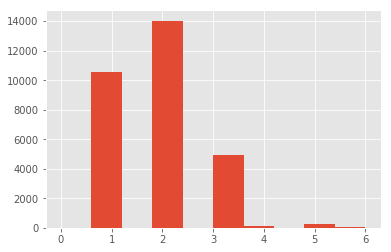

In [6]:
# Distribution of Age in the Dataset 
df['X3'].hist()

In [7]:
def binning(X3):
    if X3 >= 1 and X3 <= 2:                
        return(1)
    else:      
        return(0)
df['X3_Bins'] = df['X3'].apply(binning)
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X3_Bins
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,1


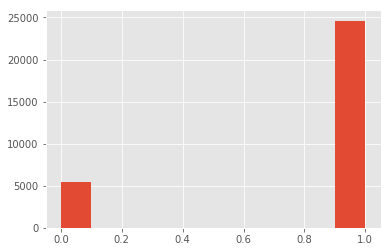

In [8]:
# Distribution of Binned Education in the Dataset 
df['X3_Bins'].hist()

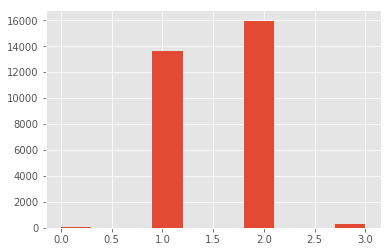

In [9]:
# Distribution of Marriage in the Dataset 
df['X4'].hist()

In [10]:
def binning(X4):
    if X4 == 1:                
        return(1)
    else:      
        return(0)
df['X4_Bins'] = df['X4'].apply(binning)
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X16,X17,X18,X19,X20,X21,X22,X23,X3_Bins,X4_Bins
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,0
3,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,1,0
4,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,1,1
5,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,1,1


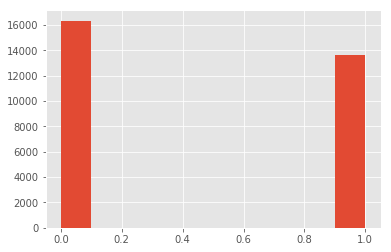

In [11]:
# Distribution of Marriage in the Dataset 
df['X4_Bins'].hist()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: X5, dtype: float64

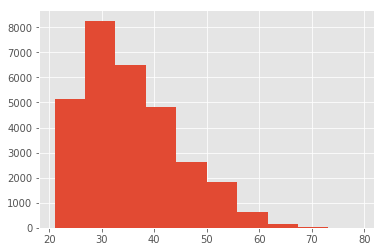

In [12]:
# Binning of Age Variable
# Checking distribution of Age in the Dataset 
df['X5'].hist()
df['X5'].describe()

In [13]:
# Trying to create bins out of the age variable
pd.qcut(df['X5'], 3)
# Creating 3 equal height bins for Age 

1        (20.999, 30.0]
2        (20.999, 30.0]
3          (30.0, 39.0]
4          (30.0, 39.0]
5          (39.0, 79.0]
6          (30.0, 39.0]
7        (20.999, 30.0]
8        (20.999, 30.0]
9        (20.999, 30.0]
10         (30.0, 39.0]
11         (30.0, 39.0]
12         (39.0, 79.0]
13         (39.0, 79.0]
14       (20.999, 30.0]
15       (20.999, 30.0]
16       (20.999, 30.0]
17       (20.999, 30.0]
18         (39.0, 79.0]
19         (39.0, 79.0]
20       (20.999, 30.0]
21         (30.0, 39.0]
22         (30.0, 39.0]
23       (20.999, 30.0]
24         (39.0, 79.0]
25       (20.999, 30.0]
26       (20.999, 30.0]
27       (20.999, 30.0]
28       (20.999, 30.0]
29         (39.0, 79.0]
30       (20.999, 30.0]
              ...      
29971      (30.0, 39.0]
29972      (30.0, 39.0]
29973      (30.0, 39.0]
29974      (30.0, 39.0]
29975      (30.0, 39.0]
29976      (39.0, 79.0]
29977      (39.0, 79.0]
29978      (30.0, 39.0]
29979      (30.0, 39.0]
29980      (30.0, 39.0]
29981      (39.0

In [14]:
def binning(X5):
    if X5 > 20 and X5 <= 30:                
        return(0)
    if X5 > 30 and X5 <= 39:        
        return(1)
    if X5 > 39:      
        return(2)
df['X5_Bins'] = df['X5'].apply(binning)
df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X17,X18,X19,X20,X21,X22,X23,X3_Bins,X4_Bins,X5_Bins
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,1,0
2,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,0,0
3,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,1,0,1
4,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,1,1,1
5,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,1,1,2
6,50000,1,1,2,37,0,0,0,0,0,...,20024,2500,1815,657,1000,1000,800,1,0,1
7,500000,1,1,2,29,0,0,0,0,0,...,473944,55000,40000,38000,20239,13750,13770,1,0,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,567,380,601,0,581,1687,1542,1,0,0
9,140000,2,3,1,28,0,0,2,0,0,...,3719,3329,0,432,1000,1000,1000,0,1,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,13912,0,0,0,13007,1122,0,0,0,1


In [15]:
df = df.drop(['X5', 'X4', 'X3'], axis=1)

In [16]:
df['X6_BI']= np.where(df['X6']>0 ,1,0)
df['X7_BI']= np.where(df['X7']>0 ,1,0)
df['X8_BI']= np.where(df['X8']>0 ,1,0)
df['X9_BI']= np.where(df['X9']>0 ,1,0)
df['X10_BI']= np.where(df['X10']>0 ,1,0)
df['X11_BI']= np.where(df['X11']>0 ,1,0)
df.head()

,X1,X2,X6,X7,X8,X9,X10,X11,X12,X13,...,X23,X3_Bins,X4_Bins,X5_Bins,X6_BI,X7_BI,X8_BI,X9_BI,X10_BI,X11_BI
1,20000,2,2,2,-1,-1,-2,-2,3913,3102,...,0,1,1,0,1,1,0,0,0,0
2,120000,2,-1,2,0,0,0,2,2682,1725,...,2000,1,0,0,0,1,0,0,0,1
3,90000,2,0,0,0,0,0,0,29239,14027,...,5000,1,0,1,0,0,0,0,0,0
4,50000,2,0,0,0,0,0,0,46990,48233,...,1000,1,1,1,0,0,0,0,0,0
5,50000,1,-1,0,-1,0,0,0,8617,5670,...,679,1,1,2,0,0,0,0,0,0


In [17]:
df = df.drop(['X6', 'X7', 'X8', 'X10', 'X11', 'X9'], axis=1)

In [18]:
df['X12_BI']= np.where(df['X12']>0 ,1,0)
df['X13_BI']= np.where(df['X13']>0 ,1,0)
df['X14_BI']= np.where(df['X14']>0 ,1,0)
df['X15_BI']= np.where(df['X15']>0 ,1,0)
df['X16_BI']= np.where(df['X16']>0 ,1,0)
df['X17_BI']= np.where(df['X17']>0 ,1,0)
df.head(5)

,X1,X2,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_BI,X9_BI,X10_BI,X11_BI,X12_BI,X13_BI,X14_BI,X15_BI,X16_BI,X17_BI
1,20000,2,3913,3102,689,0,0,0,0,689,...,0,0,0,0,1,1,1,0,0,0
2,120000,2,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,1,1,1,1,1,1
3,90000,2,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,1,1,1,1,1,1
4,50000,2,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,1,1,1,1,1,1
5,50000,1,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,1,1,1,1,1,1


In [19]:
df['X12_ABS'] = abs(df['X12'])
df['X13_ABS'] = abs(df['X13'])
df['X14_ABS'] = abs(df['X14'])
df['X15_ABS'] = abs(df['X15'])
df['X16_ABS'] = abs(df['X16'])
df['X17_ABS'] = abs(df['X17'])
df.head(5)

,X1,X2,X12,X13,X14,X15,X16,X17,X18,X19,...,X14_BI,X15_BI,X16_BI,X17_BI,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS
1,20000,2,3913,3102,689,0,0,0,0,689,...,1,0,0,0,3913,3102,689,0,0,0
2,120000,2,2682,1725,2682,3272,3455,3261,0,1000,...,1,1,1,1,2682,1725,2682,3272,3455,3261
3,90000,2,29239,14027,13559,14331,14948,15549,1518,1500,...,1,1,1,1,29239,14027,13559,14331,14948,15549
4,50000,2,46990,48233,49291,28314,28959,29547,2000,2019,...,1,1,1,1,46990,48233,49291,28314,28959,29547
5,50000,1,8617,5670,35835,20940,19146,19131,2000,36681,...,1,1,1,1,8617,5670,35835,20940,19146,19131


In [20]:
df['X12_M']= np.where(df['X12'].isnull(),6,6)
df['X13_M']= np.where(df['X13'].isnull(),5,5)
df['X14_M']= np.where(df['X14'].isnull(),4,4)
df['X15_M']= np.where(df['X15'].isnull(),3,3)
df['X16_M']= np.where(df['X16'].isnull(),2,2)
df['X17_M']= np.where(df['X17'].isnull(),1,1)
df.head()

,X1,X2,X12,X13,X14,X15,X16,X17,X18,X19,...,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X12_M,X13_M,X14_M,X15_M,X16_M,X17_M
1,20000,2,3913,3102,689,0,0,0,0,689,...,689,0,0,0,6,5,4,3,2,1
2,120000,2,2682,1725,2682,3272,3455,3261,0,1000,...,2682,3272,3455,3261,6,5,4,3,2,1
3,90000,2,29239,14027,13559,14331,14948,15549,1518,1500,...,13559,14331,14948,15549,6,5,4,3,2,1
4,50000,2,46990,48233,49291,28314,28959,29547,2000,2019,...,49291,28314,28959,29547,6,5,4,3,2,1
5,50000,1,8617,5670,35835,20940,19146,19131,2000,36681,...,35835,20940,19146,19131,6,5,4,3,2,1


In [21]:
df = df.drop(['X12', 'X13', 'X14', 'X15', 'X16', 'X17'], axis=1)

In [22]:
# Defining functin to replace outliers using IQR of each column
def outlier_replace(x): 
    if x > (Q3 + (1.5*IQR)): 
        x = Q3
    elif x < (Q1 - (1.5*IQR)): 
        x = Q1
    else: 
        pass
    return(x)

Text(0.5, 1.0, 'Fixed Outliers')

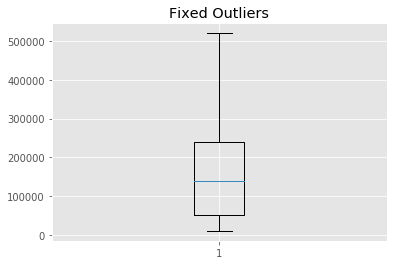

In [23]:
Q1 = df['X1'].quantile(0.25)
Q3 = df['X1'].quantile(0.75)
IQR = iqr(df['X1'])
df['X1'] = df['X1'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X1'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

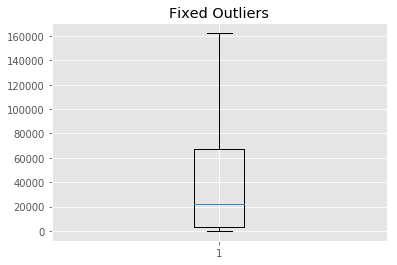

In [24]:
Q1 = df['X12_ABS'].quantile(0.25)
Q3 = df['X12_ABS'].quantile(0.75)
IQR = iqr(df['X12_ABS'])
df['X12_ABS'] = df['X12_ABS'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X12_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

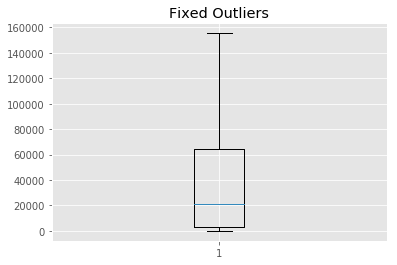

In [25]:
Q1 = df['X13_ABS'].quantile(0.25)
Q3 = df['X13_ABS'].quantile(0.75)
IQR = iqr(df['X13_ABS'])
df['X13_ABS'] = df['X13_ABS'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X13_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

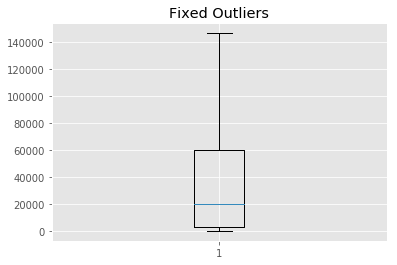

In [26]:
Q1 = df['X14_ABS'].quantile(0.25)
Q3 = df['X14_ABS'].quantile(0.75)
IQR = iqr(df['X14_ABS'])
df['X14_ABS'] = df['X14_ABS'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X14_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

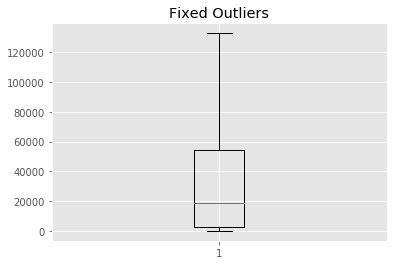

In [27]:
Q1 = df['X15_ABS'].quantile(0.25)
Q3 = df['X15_ABS'].quantile(0.75)
IQR = iqr(df['X15_ABS'])
df['X15_ABS'] = df['X15_ABS'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X15_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

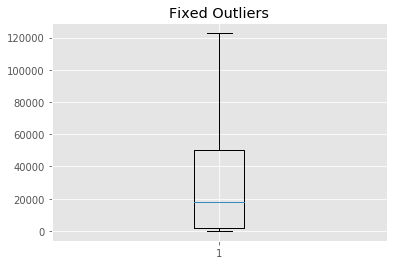

In [28]:
Q1 = df['X16_ABS'].quantile(0.25)
Q3 = df['X16_ABS'].quantile(0.75)
IQR = iqr(df['X16_ABS'])
df['X16_ABS'] = df['X16_ABS'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X16_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

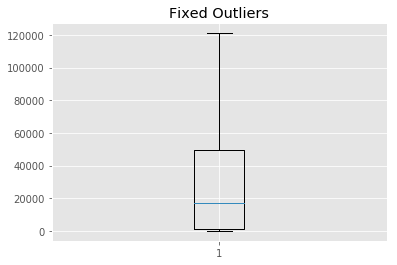

In [29]:
Q1 = df['X17_ABS'].quantile(0.25)
Q3 = df['X17_ABS'].quantile(0.75)
IQR = iqr(df['X17_ABS'])
df['X17_ABS'] = df['X17_ABS'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X17_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

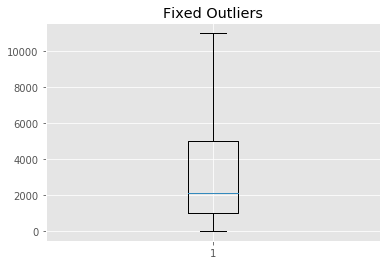

In [30]:
Q1 = df['X18'].quantile(0.25)
Q3 = df['X18'].quantile(0.75)
IQR = iqr(df['X18'])
df['X18'] = df['X18'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X18'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

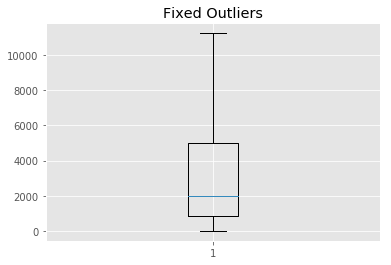

In [31]:
Q1 = df['X19'].quantile(0.25)
Q3 = df['X19'].quantile(0.75)
IQR = iqr(df['X19'])
df['X19'] = df['X19'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X19'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

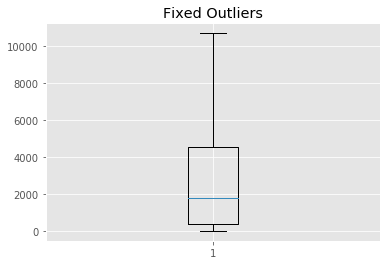

In [32]:
Q1 = df['X20'].quantile(0.25)
Q3 = df['X20'].quantile(0.75)
IQR = iqr(df['X20'])
df['X20'] = df['X20'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X20'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

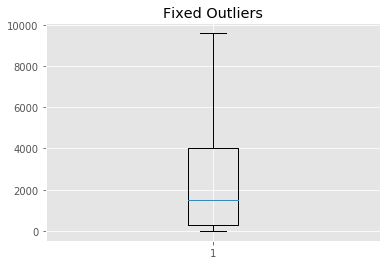

In [33]:
Q1 = df['X21'].quantile(0.25)
Q3 = df['X21'].quantile(0.75)
IQR = iqr(df['X21'])
df['X21'] = df['X21'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X21'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

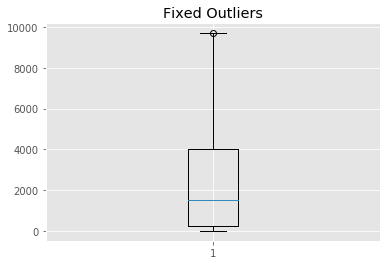

In [34]:
Q1 = df['X22'].quantile(0.25)
Q3 = df['X22'].quantile(0.75)
IQR = iqr(df['X22'])
df['X22'] = df['X22'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X22'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

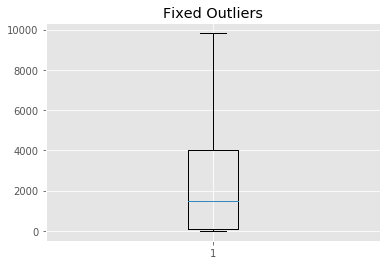

In [35]:
Q1 = df['X23'].quantile(0.25)
Q3 = df['X23'].quantile(0.75)
IQR = iqr(df['X23'])
df['X23'] = df['X23'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X23'])
plt.title("Fixed Outliers")

In [36]:
dfnorm = df.filter(['X1', "X12_ABS", "X13_ABS", "X14_ABS", "X15_ABS", "X16_ABS", "X17_ABS","X18", "X19", "X20", "X21", "X22", "X23"], axis=1)
df = df.drop(["X1", 'X12_ABS', 'X13_ABS', 'X14_ABS', 'X15_ABS', 'X16_ABS', 'X17_ABS',"X18","X19", "X20", "X21", "X22", "X23"], axis=1)

In [37]:
dfnorm.head()

,X1,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X18,X19,X20,X21,X22,X23
1,20000.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,5000.0,10000.0,9000.0,689.0,679.0


In [38]:
cols = dfnorm.columns.values.tolist()
cols

['X1',
 'X12_ABS',
 'X13_ABS',
 'X14_ABS',
 'X15_ABS',
 'X16_ABS',
 'X17_ABS',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23']

In [39]:
from sklearn.preprocessing import MinMaxScaler
minmax = preprocessing.MinMaxScaler()
dfnorm = (minmax.fit_transform(dfnorm))
dfnorm = pd.DataFrame(dfnorm, columns=cols)

In [40]:
dfnorm.head()

,X1,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X18,X19,X20,X21,X22,X23
0,0.019608,0.024110,0.019957,0.004710,0.000000,0.000000,0.000000,0.000000,0.061250,0.000000,0.000000,0.000000,0.000000
1,0.215686,0.016525,0.011098,0.018335,0.024640,0.028149,0.026937,0.000000,0.088897,0.093694,0.104341,0.000000,0.203728
2,0.156863,0.180158,0.090242,0.092694,0.107921,0.121786,0.128438,0.137837,0.133345,0.093694,0.104341,0.103093,0.509321
3,0.078431,0.289533,0.310304,0.336970,0.213221,0.235938,0.244065,0.181604,0.179483,0.112433,0.114775,0.110206,0.101864
4,0.078431,0.053094,0.036478,0.244980,0.157690,0.155988,0.158026,0.181604,0.444484,0.936944,0.939065,0.071031,0.069166


In [41]:
df = pd.concat([df,dfnorm], axis=1, join='inner')
df.head()

,X2,X3_Bins,X4_Bins,X5_Bins,X6_BI,X7_BI,X8_BI,X9_BI,X10_BI,X11_BI,...,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X18,X19,X20,X21,X22,X23
1,2,1,1,0,1,1,0,0,0,0,...,0.018335,0.024640,0.028149,0.026937,0.000000,0.088897,0.093694,0.104341,0.000000,0.203728
2,2,1,0,0,0,1,0,0,0,1,...,0.092694,0.107921,0.121786,0.128438,0.137837,0.133345,0.093694,0.104341,0.103093,0.509321
3,2,1,0,1,0,0,0,0,0,0,...,0.336970,0.213221,0.235938,0.244065,0.181604,0.179483,0.112433,0.114775,0.110206,0.101864
4,2,1,1,1,0,0,0,0,0,0,...,0.244980,0.157690,0.155988,0.158026,0.181604,0.444484,0.936944,0.939065,0.071031,0.069166
5,1,1,1,2,0,0,0,0,0,0,...,0.393828,0.146048,0.159842,0.165403,0.227004,0.161348,0.061557,0.104341,0.103093,0.081491


In [42]:
df.skew()

X2        -0.424269
X3_Bins   -1.670300
X4_Bins    0.179601
X5_Bins    0.115081
X6_BI      1.301638
X7_BI      1.983329
X8_BI      2.069877
X9_BI      2.383233
X10_BI     2.686634
X11_BI     2.618809
X12_BI    -2.939836
X13_BI    -2.562718
X14_BI    -2.375725
X15_BI    -2.213658
X16_BI    -2.090704
X17_BI    -1.886380
X12_M      0.000000
X13_M      0.000000
X14_M      0.000000
X15_M      0.000000
X16_M      0.000000
X17_M      0.000000
X1         0.873662
X12_ABS    1.126548
X13_ABS    1.130228
X14_ABS    1.139621
X15_ABS    1.147937
X16_ABS    1.158215
X17_ABS    1.177348
X18        0.932252
X19        0.996387
X20        1.122606
X21        0.998843
X22        0.995135
X23        1.012444
dtype: float64

-0.36741633550284664

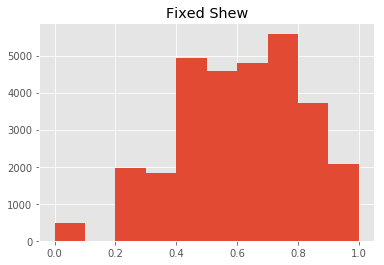

In [43]:
df['X1'] = np.cbrt(df['X1'])
plt.hist(df['X1'])
plt.title("Fixed Shew")
df['X1'].skew()

-0.21603098199047532

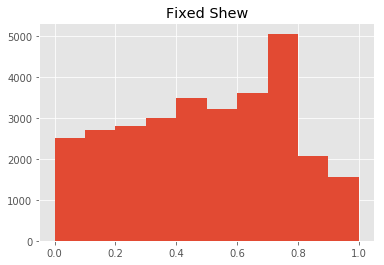

In [44]:
df['X12_ABS'] = np.cbrt(df['X12_ABS'])
plt.hist(df['X12_ABS'])
plt.title("Fixed Shew")
df['X12_ABS'].skew()

-0.23867124715814053

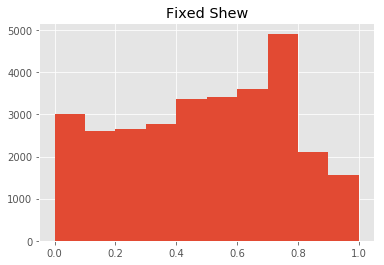

In [45]:
df['X13_ABS'] = np.cbrt(df['X13_ABS'])
plt.hist(df['X13_ABS'])
plt.title("Fixed Shew")
df['X13_ABS'].skew()

-0.2583472623260525

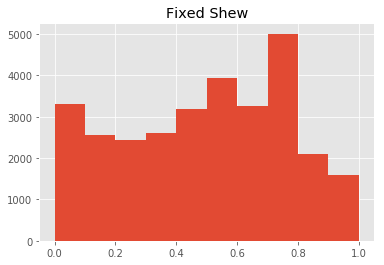

In [46]:
df['X14_ABS'] = np.cbrt(df['X14_ABS'])
plt.hist(df['X14_ABS'])
plt.title("Fixed Shew")
df['X14_ABS'].skew()

-0.2745732495408011

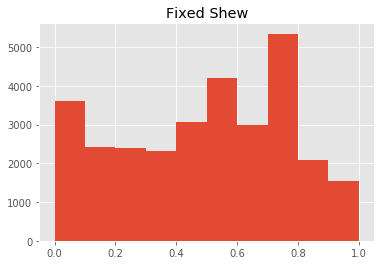

In [47]:
df['X15_ABS'] = np.cbrt(df['X15_ABS'])
plt.hist(df['X15_ABS'])
plt.title("Fixed Shew")
df['X15_ABS'].skew()

-0.26444552686040584

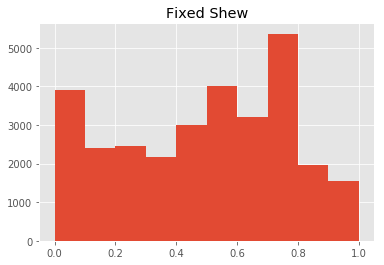

In [48]:
df['X16_ABS'] = np.cbrt(df['X16_ABS'])
plt.hist(df['X16_ABS'])
plt.title("Fixed Shew")
df['X16_ABS'].skew()

-0.22637739383797625

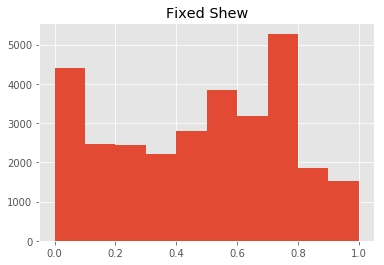

In [49]:
df['X17_ABS'] = np.cbrt(df['X17_ABS'])
plt.hist(df['X17_ABS'])
plt.title("Fixed Shew")
df['X17_ABS'].skew()

-0.7423130919489728

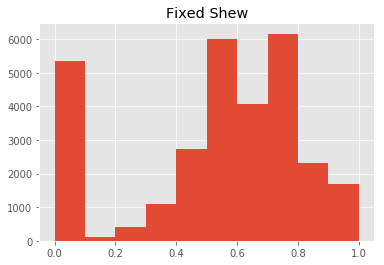

In [50]:
df['X18'] = np.cbrt(df['X18'])
plt.hist(df['X18'])
plt.title("Fixed Shew")
df['X18'].skew()

-0.6971934759209263

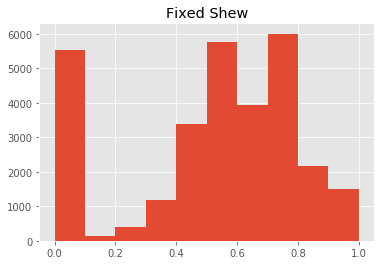

In [51]:
df['X19'] = (np.cbrt(df['X19']))
plt.hist(df['X19'])
plt.title("Fixed Shew")
df['X19'].skew()

-0.5366065283865535

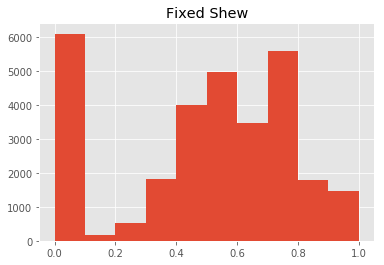

In [52]:
df['X20'] = (np.cbrt(df['X20']))
plt.hist(df['X20'])
plt.title("Fixed Shew")
df['X20'].skew()

-0.49139316106016934

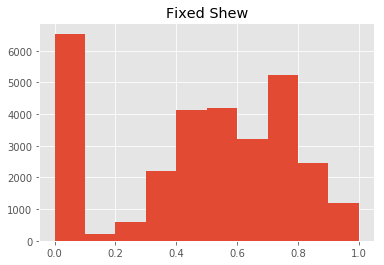

In [53]:
df['X21'] = np.cbrt(df['X21'])
plt.hist(df['X21'])
plt.title("Fixed Shew")
df['X21'].skew()

-0.4858087022209667

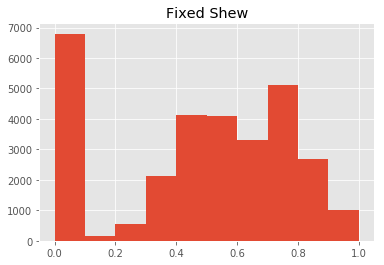

In [54]:
df['X22'] = (np.cbrt(df['X22']))
plt.hist(df['X22'])
plt.title("Fixed Shew")
df['X22'].skew()

-0.44745474182993206

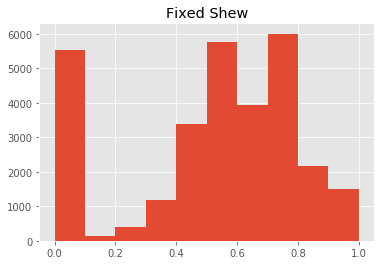

In [55]:
df['X23'] = (np.cbrt(df['X23']))
plt.hist(df['X19'])
plt.title("Fixed Shew")
df['X23'].skew()

In [56]:
df.skew()

X2        -0.424269
X3_Bins   -1.670300
X4_Bins    0.179601
X5_Bins    0.115081
X6_BI      1.301638
X7_BI      1.983329
X8_BI      2.069877
X9_BI      2.383233
X10_BI     2.686634
X11_BI     2.618809
X12_BI    -2.939836
X13_BI    -2.562718
X14_BI    -2.375725
X15_BI    -2.213658
X16_BI    -2.090704
X17_BI    -1.886380
X12_M      0.000000
X13_M      0.000000
X14_M      0.000000
X15_M      0.000000
X16_M      0.000000
X17_M      0.000000
X1        -0.367416
X12_ABS   -0.216031
X13_ABS   -0.238671
X14_ABS   -0.258347
X15_ABS   -0.274573
X16_ABS   -0.264446
X17_ABS   -0.226377
X18       -0.742313
X19       -0.697193
X20       -0.536607
X21       -0.491393
X22       -0.485809
X23       -0.447455
dtype: float64

In [57]:
target.head()

,Y
1,1
2,1
3,0
4,0
5,0


In [58]:
df.head()

,X2,X3_Bins,X4_Bins,X5_Bins,X6_BI,X7_BI,X8_BI,X9_BI,X10_BI,X11_BI,...,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X18,X19,X20,X21,X22,X23
1,2,1,1,0,1,1,0,0,0,0,...,0.263690,0.290992,0.304196,0.299765,0.000000,0.446302,0.454190,0.470780,0.000000,0.588415
2,2,1,0,0,0,1,0,0,0,1,...,0.452568,0.476104,0.495677,0.504543,0.516562,0.510888,0.454190,0.470780,0.468896,0.798602
3,2,1,0,1,0,0,0,0,0,0,...,0.695874,0.597415,0.617920,0.624935,0.566293,0.564080,0.482649,0.485977,0.479441,0.467025
4,2,1,1,1,0,0,0,0,0,0,...,0.625716,0.540258,0.538308,0.540642,0.566293,0.763165,0.978523,0.979261,0.414142,0.410485
5,1,1,1,2,0,0,0,0,0,0,...,0.732997,0.526621,0.542705,0.548927,0.610021,0.544403,0.394845,0.470780,0.468896,0.433548


In [59]:
df = pd.concat([df,target], axis=1, join='inner')
df.head()

,X2,X3_Bins,X4_Bins,X5_Bins,X6_BI,X7_BI,X8_BI,X9_BI,X10_BI,X11_BI,...,X15_ABS,X16_ABS,X17_ABS,X18,X19,X20,X21,X22,X23,Y
1,2,1,1,0,1,1,0,0,0,0,...,0.290992,0.304196,0.299765,0.000000,0.446302,0.454190,0.470780,0.000000,0.588415,1
2,2,1,0,0,0,1,0,0,0,1,...,0.476104,0.495677,0.504543,0.516562,0.510888,0.454190,0.470780,0.468896,0.798602,1
3,2,1,0,1,0,0,0,0,0,0,...,0.597415,0.617920,0.624935,0.566293,0.564080,0.482649,0.485977,0.479441,0.467025,0
4,2,1,1,1,0,0,0,0,0,0,...,0.540258,0.538308,0.540642,0.566293,0.763165,0.978523,0.979261,0.414142,0.410485,0
5,1,1,1,2,0,0,0,0,0,0,...,0.526621,0.542705,0.548927,0.610021,0.544403,0.394845,0.470780,0.468896,0.433548,0


In [60]:
y = df.loc[:, ['Y']].values.ravel()

dfnew = df.drop(['Y'], axis=1)

In [61]:
# Recursive Feature Elimination for Y1 target 
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(dfnew, y)
# summarize the selection of the attributes
print(rfe.support_)
print(dict(zip(df.columns, rfe.ranking_)))

[False False False False  True False  True False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
{'X2': 10, 'X3_Bins': 33, 'X4_Bins': 9, 'X5_Bins': 31, 'X6_BI': 1, 'X7_BI': 13, 'X8_BI': 1, 'X9_BI': 6, 'X10_BI': 1, 'X11_BI': 2, 'X12_BI': 3, 'X13_BI': 7, 'X14_BI': 26, 'X15_BI': 23, 'X16_BI': 4, 'X17_BI': 11, 'X12_M': 5, 'X13_M': 8, 'X14_M': 12, 'X15_M': 21, 'X16_M': 25, 'X17_M': 30, 'X1': 18, 'X12_ABS': 24, 'X13_ABS': 19, 'X14_ABS': 14, 'X15_ABS': 15, 'X16_ABS': 22, 'X17_ABS': 16, 'X18': 20, 'X19': 29, 'X20': 28, 'X21': 32, 'X22': 17, 'X23': 27}


In [62]:
# Exporting DataFrame as CSV 
df.to_csv('Final6', ',')

In [63]:
# Logistic Regression 
df.columns.values

array(['X2', 'X3_Bins', 'X4_Bins', 'X5_Bins', 'X6_BI', 'X7_BI', 'X8_BI',
       'X9_BI', 'X10_BI', 'X11_BI', 'X12_BI', 'X13_BI', 'X14_BI',
       'X15_BI', 'X16_BI', 'X17_BI', 'X12_M', 'X13_M', 'X14_M', 'X15_M',
       'X16_M', 'X17_M', 'X1', 'X12_ABS', 'X13_ABS', 'X14_ABS', 'X15_ABS',
       'X16_ABS', 'X17_ABS', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23',
       'Y'], dtype=object)

In [64]:
X = df.iloc[:,:-1] # Features
y = df.Y # Target variable

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [66]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [67]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5650,  230],
       [1149,  471]])

Text(0.5, 257.44, 'Predicted label')

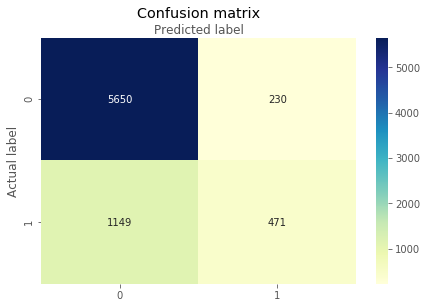

In [68]:
import seaborn as sns


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8161333333333334
Precision: 0.6718972895863052
Recall: 0.29074074074074074


In [70]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print(MAE)

0.18386666666666668


In [71]:
# Import Decision Tree Classifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Create Decision Tree Classifier Object 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset 
y_pred = clf.predict(X_test)

# Model Accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7117333333333333
             precision    recall  f1-score   support

          0       0.82      0.80      0.81      5880
          1       0.35      0.37      0.36      1620

avg / total       0.72      0.71      0.72      7500

[[4732 1148]
 [1014  606]]


In [72]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print(MAE)

0.28826666666666667


In [73]:
# Feature Importance 
from sklearn import metrics 
from sklearn.ensemble import ExtraTreesClassifier

# Fit an Extra Trees model to the data 
model = ExtraTreesClassifier()
model.fit(X,y)

# Display the relative importance of each attribute 
#print(model.feature_importances_)
print(dict(zip(df.columns, model.feature_importances_)))

{'X2': 0.01647733477124749, 'X3_Bins': 0.014910066411012968, 'X4_Bins': 0.014482563190169637, 'X5_Bins': 0.0322272804902204, 'X6_BI': 0.06052773719231687, 'X7_BI': 0.05163798806506735, 'X8_BI': 0.035863606153811664, 'X9_BI': 0.02651902690396285, 'X10_BI': 0.009845229420256296, 'X11_BI': 0.01495544909635762, 'X12_BI': 0.010804463944631203, 'X13_BI': 0.005636376789978934, 'X14_BI': 0.0058061778286013785, 'X15_BI': 0.005966970712547893, 'X16_BI': 0.007417166662359143, 'X17_BI': 0.00786647984406294, 'X12_M': 0.0, 'X13_M': 0.0, 'X14_M': 0.0, 'X15_M': 0.0, 'X16_M': 0.0, 'X17_M': 0.0, 'X1': 0.06559002242528109, 'X12_ABS': 0.057164090188143946, 'X13_ABS': 0.053329720075438944, 'X14_ABS': 0.05026990401957314, 'X15_ABS': 0.04961915877237296, 'X16_ABS': 0.04944255750330813, 'X17_ABS': 0.048594643831594446, 'X18': 0.05216692101989199, 'X19': 0.05103062379411094, 'X20': 0.04999666330861284, 'X21': 0.05067666491553905, 'X22': 0.04981167173174083, 'X23': 0.05136344093778709}


In [74]:
# FIN